### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Еременко Артем Геннадьевич
##### Группа:   НПИбд-01-18

## Москва 2021
***

### ЛР 7, вариант 30 

Banknote Authentication Data Set 

Название файла: data_banknote_authentication.txt 

Ссылка: http://archive.ics.uci.edu/ml/datasets/banknote+authentication 

Класс: class (столбец No 5) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

def PolynomialLinearSVC(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('svc', LinearSVC())
    ])

def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

#### 1. Считайте заданный набор данных из репозитария UCI.

In [2]:
url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"



main_df = pd.read_csv( url,\
                      header=None)


#df.columns = 

main_df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


#### 2.         Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding).
 



In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Вывод: cреди меток класса отсутствуют пропущенные значения, в признаках отсутствуют пропущенные значения, все числовые признаки в наборе были распознаны верно, в наборе данных есть только числовые признаки.

#### 3.          Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определите и оставьте в наборе наиболее важные признаки (не менее 5 и не более 10).

 



In [4]:
# load data
X = pd.DataFrame.to_numpy(main_df.drop(4,axis=1))
y = pd.DataFrame.to_numpy(main_df[4])

In [5]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.50916965 0.27659953 0.15232516 0.06190566]


Так как в задании указано, что нужно оставить не менее 5 признаков, а в наборе изначально было всего 4 признака, то оставляем все.

#### 4.         Разбейте набор данных на обучающую и тестовую выборки.

 



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 5.          Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите точность классификации и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности (не нужно удалять из набора все признаки кроме двух).

 



In [7]:
dt_clf = DecisionTreeClassifier(max_depth=5)

In [8]:
dt_clf.fit(X_train[:,0:2], y_train)
dt_clf.score(X_test[:,0:2], y_test)

0.8980582524271845

In [9]:
y_predict = dt_clf.predict(X_test[:,0:2])

In [10]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 1))

In [11]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 1) & (y_predict == 1))

In [12]:
def precision_score(y_true, y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp / (tp + fp)
    except:
        return 0.0
    

In [13]:
print('Точность: '+str(precision_score(y_test, y_predict)))

Точность: 0.9209039548022598


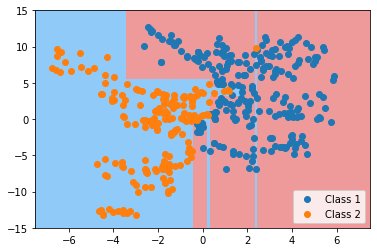

In [14]:
plot_decision_boundary(dt_clf, axis=[-7.5, 7.5, -15, 15])
plt.scatter(X_test[:,0:2][y_predict==0,0], X_test[:,0:2][y_predict==0,1], label = 'Class 1')
plt.scatter(X_test[:,0:2][y_predict==1,0], X_test[:,0:2][y_predict==1,1], label = 'Class 2')
plt.legend(loc="lower right")
plt.show()

#### 6.         Постройте на основе классификатора деревьев решений ансамблевые классификаторы:

* BaggingClassifier,
* RandomForestClassifier,
* AdaBoostClassifier,

#### а также классификатор:

* GradientBoostingClassifier,

#### подберите параметры классификаторов, чтобы добиться большей точности классификации, и постройте границы принятия решений классификаторов с визуализацией точек набора данных и легендой для меток классов.

 



In [15]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=500, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train[:,0:2], y_train)
bagging_clf.score(X_test[:,0:2], y_test)

0.9029126213592233

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, 
                                random_state=666, n_jobs=-1)
rf_clf.fit(X_train[:,0:2], y_train)
rf_clf.score(X_test[:,0:2], y_test)

0.9223300970873787

In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train[:,0:2], y_train)
ada_clf.score(X_test[:,0:2], y_test)

0.9150485436893204

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train[:,0:2], y_train)
gb_clf.score(X_test[:,0:2], y_test)

0.8956310679611651

In [30]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('bagging_clf', BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=5000, max_samples=100,
                           bootstrap=True)), 
    ('rf_clf', RandomForestClassifier(n_estimators=500, oob_score=True, 
                                random_state=666, n_jobs=-1)),
    ('ada_clf', AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                   n_estimators=500))],
                             voting='hard')
voting_clf.fit(X_train[:,0:2], y_train)
voting_clf.score(X_test[:,0:2], y_test)

0.9199029126213593

In [ ]:
y_predict1 = bagging_clf.predict(X_test[:,0:2])
y_predict2 = rf_clf.predict(X_test[:,0:2])
y_predict3 = ada_clf.predict(X_test[:,0:2])
y_predict4 = voting_clf.predict(X_test[:,0:2])

In [ ]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3 + y_predict4) >= 2, dtype='int')

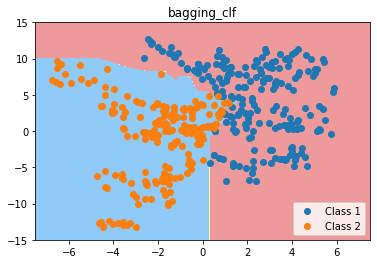

In [22]:
plot_decision_boundary(bagging_clf, axis=[-7.5, 7.5, -15, 15])
plt.scatter(X_test[:,0:2][y_predict1==0,0], X_test[:,0:2][y_predict1==0,1], label = 'Class 1')
plt.scatter(X_test[:,0:2][y_predict1==1,0], X_test[:,0:2][y_predict1==1,1], label = 'Class 2')
plt.legend(loc="lower right")
plt.title('bagging_clf')
plt.show()

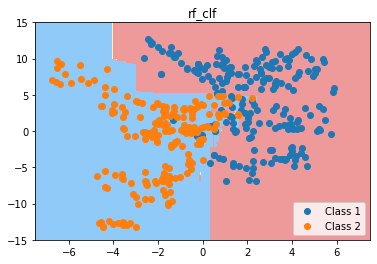

In [23]:
plot_decision_boundary(rf_clf, axis=[-7.5, 7.5, -15, 15])
plt.scatter(X_test[:,0:2][y_predict2==0,0], X_test[:,0:2][y_predict2==0,1], label = 'Class 1')
plt.scatter(X_test[:,0:2][y_predict2==1,0], X_test[:,0:2][y_predict2==1,1], label = 'Class 2')
plt.legend(loc="lower right")
plt.title('rf_clf')
plt.show()

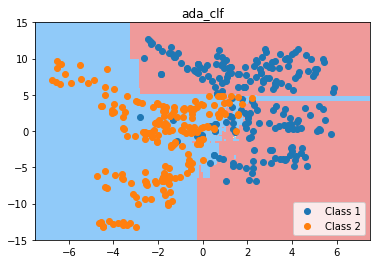

In [24]:
plot_decision_boundary(ada_clf, axis=[-7.5, 7.5, -15, 15])
plt.scatter(X_test[:,0:2][y_predict3==0,0], X_test[:,0:2][y_predict3==0,1], label = 'Class 1')
plt.scatter(X_test[:,0:2][y_predict3==1,0], X_test[:,0:2][y_predict3==1,1], label = 'Class 2')
plt.legend(loc="lower right")
plt.title('ada_clf')
plt.show()

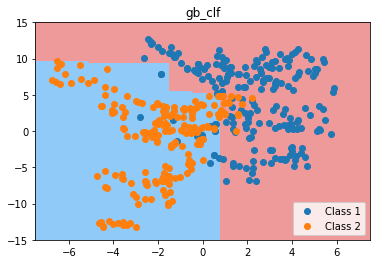

In [25]:
plot_decision_boundary(gb_clf, axis=[-7.5, 7.5, -15, 15])
plt.scatter(X_test[:,0:2][y_predict4==0,0], X_test[:,0:2][y_predict4==0,1], label = 'Class 1')
plt.scatter(X_test[:,0:2][y_predict4==1,0], X_test[:,0:2][y_predict4==1,1], label = 'Class 2')
plt.legend(loc="lower right")
plt.title('gb_clf')
plt.show()

In [31]:
plot_decision_boundary(voting_clf, axis=[-7.5, 7.5, -15, 15])
plt.scatter(X_test[:,0:2][y_predict==0,0], X_test[:,0:2][y_predict==0,1], label = 'Class 1')
plt.scatter(X_test[:,0:2][y_predict==1,0], X_test[:,0:2][y_predict==1,1], label = 'Class 2')
plt.legend(loc="lower right")
plt.title('voting_clf')
plt.show()

KeyboardInterrupt: 

#### 7.         Определите лучший ансамблевый классификатор, дающий наиболее высокую точность классификации.

In [32]:
from sklearn.metrics import accuracy_score

scores = pd.DataFrame(columns=['Classifier', 'accuracy_score'])
scores['Classifier'] = ['bagging_clf', 'rf_clf', 'ada_clf', 'gb_clf', 'voting_clf']
scores['accuracy_score'] = [accuracy_score(y_test, y_predict1),
                            accuracy_score(y_test, y_predict2),
                            accuracy_score(y_test, y_predict3),
                            accuracy_score(y_test, y_predict4),
                            accuracy_score(y_test, y_predict)]


In [33]:
print('Лучший ансамблевый классификатор: '+\
      str(scores[scores['accuracy_score']==scores['accuracy_score'].max()]['Classifier'].values[0]))

Лучший ансамблевый классификатор: rf_clf
